<img src="https://courses.edx.org/asset-v1:ACCA+ML001+2T2021+type@asset+block@acca-logo.jpg" alt="ACCA logo" style="width: 400px;"/>

# Machine learning with Python
## Part 2 - Natural language processing

* **Course:** __Machine learning with Python for finance professionals__ by ACCA
* **Instructor:** [Coefficient](https://coefficient.ai) / [@CoefficientData](https://twitter.com/CoefficientData)

---

<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Text processing in scikit-learn
</h2><br>
</div>

### Goal: Predict Category from item description

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
orders = pd.read_excel("Grocery Database.xlsx", sheet_name="Grosto DB")
orders.shape

(50447, 32)

In [3]:
orders.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,42371,2016,1,0.422260,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,42371,2016,1,0.657533,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,42371,2016,1,0.478382,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,42371,2016,1,0.478382,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,42371,2016,1,0.478382,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


Let's _just_ look at Category and Item.

In [4]:
df = orders[['Items', 'Category']].copy()
print(df.shape)
df.head()

(50447, 2)


,Items,Category
0,Oreo mini oreo sharepack,"Choco, Snacks, Sweets"
1,Ashai Lager Beer,"Wines, Beers & Spirits"
2,Cascadian farm organic strawberries,Fruit & Vegetable
3,Oraganic 4 Life Red onions,Fruit & Vegetable
4,LIVEWELL Italian mesclun salad,Fruit & Vegetable


The original dataset was purchase data, let's reduce from 50k purchases to 603 unique items only.

In [5]:
df = df.drop_duplicates().reset_index()
df.shape

(603, 3)

### Any missing values?

In [6]:
df.isnull().sum()

index       0
Items       0
Category    0
dtype: int64

### What are the available categories?

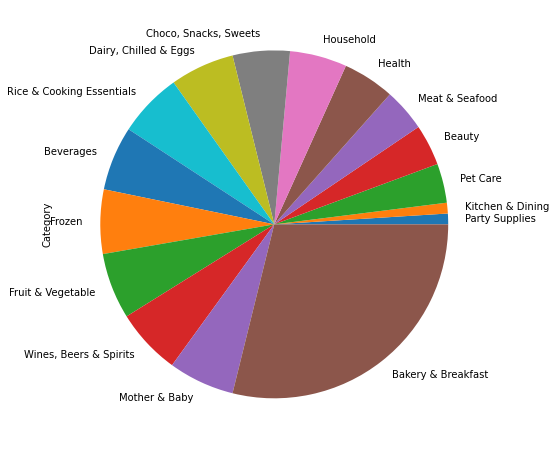

In [7]:
df.Category.value_counts().sort_values(ascending=True).plot(kind='pie', figsize=(10,8));

In [8]:
# Examples from each category
df.groupby('Category').tail(1)

,index,Items,Category
115,173,Mazaik BBQ tong,Kitchen & Dining
359,1582,Picard Nut ice cream,Frozen
391,2374,Lian Teck Biodegradable disposable,Party Supplies
399,2629,Dodo Seafood canadian scallops,Meat & Seafood
429,3911,Exclipse Sugarfree Spearmint Mints,"Choco, Snacks, Sweets"
451,6024,USA strawberries,Fruit & Vegetable
480,8457,Florida natural apple juice,"Dairy, Chilled & Eggs"
495,10547,Green & black organic cocoa powder,Beverages
508,13025,Songhe Mixed brown and red rice,Rice & Cooking Essentials
560,23639,Nakd gluten free bakewell tart raw fruit and nuts,Household


In [9]:
category_map = {
    # Bakery & Breakfast has 174 records, leave this alone
    'Bakery & Breakfast': 'Bakery & Breakfast',
    
    # Fresh Food
    'Fruit & Vegetable': 'Fresh Food',
    'Dairy, Chilled & Eggs': 'Fresh Food',
    'Meat & Seafood': 'Fresh Food',
    
    # Drinks
    'Wines, Beers & Spirits': 'Drinks',
    'Beverages': 'Drinks',
    
    # Cupboard
    'Rice & Cooking Essentials': 'Cupboard',
    'Choco, Snacks, Sweets': 'Cupboard',
    'Health': 'Cupboard',
    'Frozen': 'Cupboard',
    
    # Other
    'Household': 'Other',
    'Mother & Baby': 'Other',
    'Beauty': 'Other',
    'Pet Care': 'Other',
    'Party Supplies': 'Other',
    'Kitchen & Dining': 'Other',
}

In [10]:
df['Target'] = df.Category.map(category_map)

In [11]:
df.head()

,index,Items,Category,Target
0,0,Oreo mini oreo sharepack,"Choco, Snacks, Sweets",Cupboard
1,1,Ashai Lager Beer,"Wines, Beers & Spirits",Drinks
2,2,Cascadian farm organic strawberries,Fruit & Vegetable,Fresh Food
3,3,Oraganic 4 Life Red onions,Fruit & Vegetable,Fresh Food
4,4,LIVEWELL Italian mesclun salad,Fruit & Vegetable,Fresh Food


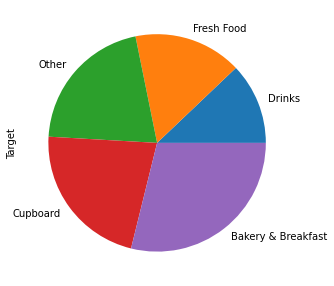

In [12]:
# How many of each of the new target categories?
df.Target.value_counts().sort_values(ascending=True).plot(kind='pie', figsize=(5,5));

### Text vectorization

It's ready for vectorization! Let's apply scikit-learn's CountVectorizer to the `Items` column.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
CountVectorizer?

We need to create a new vectorizer and specify how we want it to work. Think of this like constructing a machine to your specification, ready to feed all your text data into. 🤖

In [15]:
vectorizer = CountVectorizer(max_features=1000,     # max number of words to consider (uses first N most frequent)
                             ngram_range=(1, 2),    # e.g. (1,1) for single words, (1,2) for bigrams, etc
                             stop_words='english',  # remove English language stop words, e.g. 'to', 'the', 'it'
                             binary=True)           # use 1/0 instead of word count

The `vectorizer` "machine" hasn't yet seen any of our data. Let's change that by feeding our item descriptions into the `.fit()` method. When this runs, it will "learn a vocabulary", i.e. what words appear in this data, and how often?

In [16]:
# Use `fit` to learn the vocabulary of the titles
vectorizer.fit(df.Items)

CountVectorizer(binary=True, max_features=1000, ngram_range=(1, 2),
                stop_words='english')

Learning some vocabulary is only half the job. It's time for our `vectorizer` to apply what it learned and construct a "document-term matrix" containing one row for each sample and one column for each term (remember, a "term" may be 1 or even 2 consecutive words, as we specified a couple cells above).

In [17]:
# Use `transform` to generate the X "word matrix" - one column per feature (word or n-grams)
vectorizer.transform(df.Items)
# Sparse matrix! Only the non-zero entries are recorded...

<603x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2796 stored elements in Compressed Sparse Row format>

This sparse matrix has the same number of rows as our original data (603) and 500 columns (because we specified `max_features=500` earlier when creating our `vectorizer`). However, it's stored in a compressed format that might be machine-friendly but isn't human-friendly. Let's fix that, first by converting it to a NumPy matrix.

In [18]:
# Call .toarray() to transform this into a full matrix (less space optimised)
vectorizer.transform(df.Items).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

What's going on here? Most entries are actually zero (this is what "sparse matrix" means, the matrix is mostly empty). This is because most rows don't contain that many words, so for the top 1k words most of them won't be in a short description like "Oreo mini oreo sharepack".

The data is all here, but it's still not friendly as we're missing our column names (i.e. the word terms themselves). These have been saved for us into `vectorizer.get_feature_names()`:

In [19]:
vectorizer.get_feature_names()[:5]

['10', '100', '100 juice', '100plus', 'added']

Let's transform our vectorizer ➡ turn it into a NumPy matrix ➡ add in the feature names ➡ store all this in a pandas dataframe.

In [20]:
# Call .toarray() to transform this into a full matrix (less space optimised)
X = pd.DataFrame(vectorizer.transform(df.Items).toarray(),
                 columns=vectorizer.get_feature_names())
y = df.Target

Time to take a look.

In [21]:
# Not all columns are shown - you can disable this by calling pd.set_option('display.max_columns', None)
X.head()

,10,100,100 juice,100plus,added,adult,adult care,adult complete,adult diapers,affair,...,wholemeal white,wild,wine,wipes,wolfberry,wonders,wonders baked,yellow,yellow label,yoghurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Let's take a look at the non-zero entries in the first row, and compare to the original text.

# Original text
print(df.Items[1])

# Add some blank lines
print('\n')

# Non-zero entries in the first row
first_row = X.loc[1]
print(first_row[first_row > 0])

Ashai Lager Beer


beer    1
Name: 1, dtype: int64


<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Build a random-forest text classifier
</h2><br>
</div>

This code should be very familiar from the previous notebook.

In [23]:
from sklearn import ensemble, model_selection

In [24]:
model = ensemble.RandomForestClassifier(n_estimators=20)
model_selection.cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()

0.701556473829201

In [25]:
# What features are most important?
model.fit(X, y)
feature_importances = pd.DataFrame({'Features' : X.columns, 'Importance Score': model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance Score', ascending=False)
feature_importances.head(10)

,Features,Importance Score
74,bread,0.042442
992,wine,0.022896
235,fresh,0.019338
128,chocolate,0.017152
509,oats,0.012365
29,baby,0.012044
40,bar,0.011642
891,tea,0.011366
503,oatmeal,0.010929
101,cat,0.010568


In [26]:
# Let's also calculate which way these keywords influence the categorisation decision

def is_word_in_text(x, word):
    return word in x

def percentify(x):
    """Turns 0.1234 into 12%"""
    return f"{100*x:.0f}%"

In [27]:
for word in feature_importances.Features.head(10):
    print('\n\n-------------------\n\n')
    df[word] = df.Items.apply(is_word_in_text, word=word)
    print("Word:", word)

    # We want to calculate which categories contain this term,
    # and also what % of the items in the category contains the term
    percent_that_contains_word = df.groupby('Target')[word].mean()
    percent_that_contains_word

    # Most words are only in 1-2 categories, so let's ignore
    # categories which don't contain the word
    percent_that_contains_word = (
        percent_that_contains_word
        .sort_values(ascending=False)
        .reset_index()
        .query(f"{word} > 0")
    )

    percent_that_contains_word

    # Convert 0.212644 into 21.3%
    percent_that_contains_word[word] = percent_that_contains_word[word].apply(percentify)

    print(percent_that_contains_word)

# How to read this?

#     Word: bread
#                  Category     bread
#     0  Bakery & Breakfast     21%

# "bread" is the first item in this list, because "bread" is the feature
# with the highest importance score according to the RandomForestClassifier.

# The above suggests that this is true because "bread" appears in 21% of Bakery & Breakfast rows,
# and in no other categories. This is a fairly strong signal that rows containing "bread" belong
# to the "Bakery & Breakfast" category!



-------------------


Word: bread
               Target bread
0  Bakery & Breakfast   21%


-------------------


Word: wine
   Target wine
0  Drinks  22%


-------------------


Word: fresh
               Target fresh
0               Other    6%
1          Fresh Food    5%
2  Bakery & Breakfast    1%


-------------------


Word: chocolate
               Target chocolate
0  Bakery & Breakfast       13%
1            Cupboard        4%
2              Drinks        3%


-------------------


Word: oats
               Target oats
0  Bakery & Breakfast   7%
1              Drinks   1%


-------------------


Word: baby
  Target baby
0  Other   6%


-------------------


Word: bar
               Target  bar
0  Bakery & Breakfast  14%
1            Cupboard   3%
2              Drinks   3%
3          Fresh Food   2%
4               Other   2%


-------------------


Word: tea
               Target tea
0              Drinks  5%
1          Fresh Food  1%
2  Bakery & Breakfast  1%


------------

<div class="alert alert-block alert-warning">
<b><i class="fa fa-check-square" aria-hidden="true"></i>&nbsp; Check</b><br>

There's a lot going on in the last few cells. Run through them line by line, and ensure you follow along. If there are any pandas functions that you're unclear on it's **strongly** encouraged you take a moment to double check the [pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) or the pandas documentation or otherwise review the previous course materials.
    
You should also check if you fully understand what's happening in this last cell? We explained the bread example. Here's another example for "oats" (this may be the final example above, although random forests _are_ random so it may not be!):

```
Word: oats
               Target oats
0  Bakery & Breakfast   7%
1              Drinks   1%
```
    
The above suggests that "oats" is an important feature because:
    - it appears in 7% of `Bakery & Breakfast`
    - it appears in 1% of `Drinks`
</div>

In [28]:
# Examples containing "oats"...could be breakfast oats or oat milk
df[X['oats'] == 1].head(10)

,index,Items,Category,Target,bread,wine,fresh,chocolate,oats,baby,bar,tea,oatmeal,cat
14,14,Oats and Granola Bars,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,False,False,False,False,False,False
123,192,General Mills Cheerios whole grain oats,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,True,False,False,False,False,False
205,437,Raw rolled oats,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,True,False,False,False,False,False
254,656,3 in 1 cereal drink oats,Beverages,Drinks,False,False,False,False,True,False,False,False,False,False
276,802,100-Percent whole grainn rolled oats,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,True,False,False,False,False,False
366,1642,Gluten free organic steel cut oats,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,True,False,False,False,False,False
447,5796,organic oat for rice oats,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,True,False,False,False,False,False
464,6662,all bran original oats,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,True,False,False,False,False,False
515,14426,whole grain instant rolled oats,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,True,False,False,False,False,False
518,15036,whole rolled oats,Bakery & Breakfast,Bakery & Breakfast,False,False,False,False,True,False,False,False,False,False


---

> ### 🚩 Exercise
> Copy your hyperparameter tuning code from the previous notebook, and identify the best `max_depth` and `n_estimators` for a `RandomForestClassifier` for this problem.
> 
> **Tips:**
> - You don't need to change much at all! This is why we use generic variables like `df` and `X` and `y` and `model`...it means code you write to solve one problem is abstract enough that it can be copied verbatim to solve another problem. This is a **huge** productivity win, as you'll find out now.
> - You are welcome to try adjusting the other hyperparameters for a **[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**, it's good practice! We encourage you to read scikit-learn's **[advice on tuning random forest parameters](https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters)** as it's a great example of _why_ this is such a high quality library. This advice are the result of the library's authors distilling countless research papers into best practices!
> - _However_, if you do try experimenting with other hyperparameters, don't spend too long. `max_depth` and `n_estimators` are the big ones, and you'll get a lot more "bang for your buck" by focusing on adding some more features first and coming back to model tuning at a later stage.

In [ ]:
# ✏️ ENTER YOUR SOLUTION HERE




<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Adding more features
</h2><br>
</div>

---

> ### 🚩 Exercise
> Take your best settings for `max_depth` and `n_estimators` and enter them into the cell below.

In [29]:
# ✏️ ENTER YOUR SOLUTION HERE

best_max_depth = 1
best_n_estimators = 1

In [30]:
model = ensemble.RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

0.30012396694214877

---

We can add more features from our original dataset `orders` to our input feature matrix `X` (which contains only vectorizer-generated words/terms at the moment) as follows. Let's review the three dataframes in this notebook.

In [31]:
# orders - this is our original dataframe with 50k rows and 32 cols
print(orders.shape)
orders.head()

(50447, 32)


,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,42371,2016,1,0.422260,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,42371,2016,1,0.657533,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,42371,2016,1,0.478382,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,42371,2016,1,0.478382,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,42371,2016,1,0.478382,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [32]:
# df - contains one row for each product + item descriptions + categories + columns added in
#      our "what % of category X contains word Y" feature interpretation step earlier
print(df.shape)
df.head()

(603, 14)


,index,Items,Category,Target,bread,wine,fresh,chocolate,oats,baby,bar,tea,oatmeal,cat
0,0,Oreo mini oreo sharepack,"Choco, Snacks, Sweets",Cupboard,False,False,False,False,False,False,False,False,False,False
1,1,Ashai Lager Beer,"Wines, Beers & Spirits",Drinks,False,False,False,False,False,False,False,False,False,False
2,2,Cascadian farm organic strawberries,Fruit & Vegetable,Fresh Food,False,False,False,False,False,False,False,False,False,False
3,3,Oraganic 4 Life Red onions,Fruit & Vegetable,Fresh Food,False,False,False,False,False,False,False,False,False,False
4,4,LIVEWELL Italian mesclun salad,Fruit & Vegetable,Fresh Food,False,False,False,False,False,False,False,False,False,False


In [33]:
# X - this is our feature matrix that we input into the ML model
X.head()

,10,100,100 juice,100plus,added,adult,adult care,adult complete,adult diapers,affair,...,wholemeal white,wild,wine,wipes,wolfberry,wonders,wonders baked,yellow,yellow label,yoghurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Orders has some useful info that we can add to X. Let's add Price.

In [34]:
# This creates a lookup from Items to Price
items_to_price = (
    orders[['Items', 'Price']]
    .drop_duplicates(subset='Items')
    .set_index('Items')['Price']
)
items_to_price

Items
Oreo mini oreo sharepack                   3.09
Ashai Lager Beer                          11.60
Cascadian farm organic strawberries       13.31
Oraganic 4 Life Red onions                 3.52
LIVEWELL Italian mesclun salad             4.41
                                          ...  
Penfolds Pinot noir red wine              31.06
stress relief moisturizing lotion          4.28
Refereshing sauvignon blanc white wine    20.48
vanilla wholemeal bread                    6.59
twiggies choc-A-Lot 2 per pack             7.87
Name: Price, Length: 597, dtype: float64

In [35]:
# Use this lookup to add it into df
df['Price'] = df.Items.map(items_to_price)

In [36]:
# df maps 1:1 to X (they have the same number of rows) so we can just copy it across
X['Price'] = df['Price']

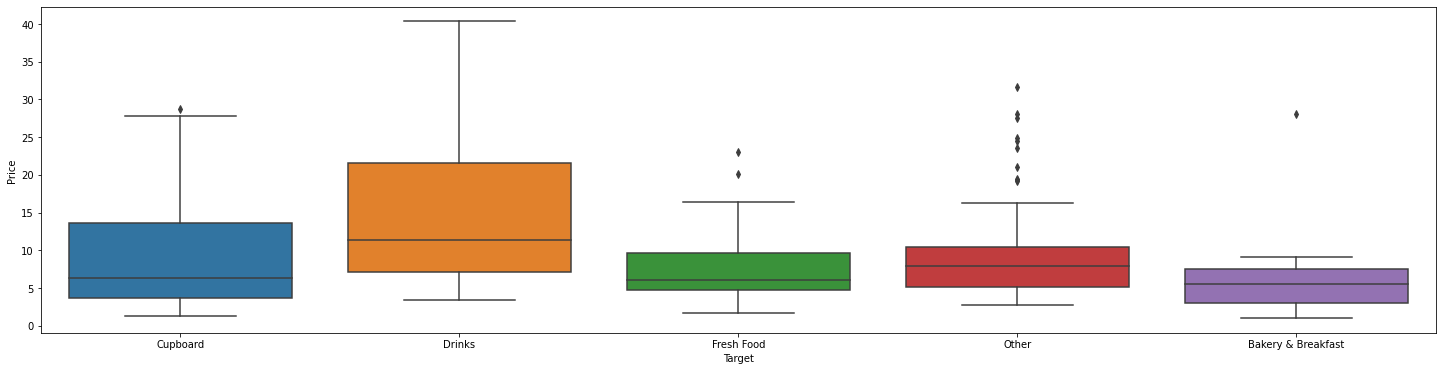

In [37]:
# Intuitively, should adding Price help?
plt.figure(figsize=(25, 6))
sns.boxplot(x='Target', y='Price', data=df);

In [38]:
# Does including Price help?
model = ensemble.RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

print(
    'Without Price:',
    model_selection.cross_val_score(model, X.drop(columns='Price'), y, cv=5, scoring='accuracy').mean()
)

print(
    'With Price:',
    model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
)

Without Price: 0.2918595041322314
With Price: 0.28855371900826443


<div class="alert alert-block alert-warning">
<b><i class="fa fa-check-square" aria-hidden="true"></i>&nbsp; Check</b><br>

Did adding Price improve this model noticeably? Try re-running the cell above a few times to get a sense of how much is "random variation" (due to the random shuffling in k-fold cross-validation or the random forest itself) and how much is a real difference, if any.
    
Were you expecting this to be a useful feature?
</div>

<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Model architecture selection
</h2><br>
</div>

In the previous notebook we included this graphic, taken from [this page on the scikit-learn documentation](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

If we follow the prompts, it suggests we try a Naive Bayes approach for this type of problem. Naive Bayes methods are a great technique to consider when building text classifiers and their history dates back to the very first email spam detection algorithms. We won't go into detail here on what Naive Bayes methods are or how they work, but do feel free to read scikit-learn's [excellent user guide on Naive Bayes techniques](https://scikit-learn.org/stable/modules/naive_bayes.html) or listen to this friendly [short Data Skeptic podcast episode on Naive Bayes classifiers for spam detection](https://dataskeptic.com/blog/episodes/2018/spam-filtering-with-naive-bayes).

<img src="https://courses.edx.org/asset-v1:ACCA+ML001+2T2021+type@asset+block@ml_map.png" alt="ML map" style="width: 1000px;"/>

In [39]:
from sklearn import naive_bayes

---

> ### 🚩 Exercise
> We've given you a Naive Bayes model in the cell below. Find & copy in your line of code from earlier that calculates the five-fold cross-validated accuracy, given `X`, `y` and a model. It _should_ work directly with the `BernoulliNB` below without any issues. It should also provide an accuracy improvement _far_ better than anything else we've done so far!
> 
> This consistency is one of the best features of scikit-learn's design: whether you're working with linear methods, decision trees, random forests, support vector machines, neural networks...it doesn't matter, everything is just "plug-and-play". Want to try out an entirely different model architecture? Just swap out the one you have for a new one, easy!

In [40]:
X = X.drop(columns='Price')

In [41]:
# How did we know to set alpha=0.1? We may have done some hyperparameter tuning in advance,
# feel free to replicate and confirm our findings.
model = naive_bayes.BernoulliNB(alpha=0.1)

In [ ]:
# ✏️ ENTER YOUR SOLUTION HERE




---

In [42]:
model = naive_bayes.BernoulliNB(alpha=0.1).fit(X, y)
df['Predicted'] = model.predict(X)
df['Correct'] = df.Predicted == y
df.query("Correct == False")

,index,Items,Category,Target,bread,wine,fresh,chocolate,oats,baby,bar,tea,oatmeal,cat,Price,Predicted,Correct
29,29,Whole korean strawberry,Frozen,Cupboard,False,False,False,False,False,False,False,False,False,False,13.97,Fresh Food,False
30,30,Ferrero rocher chocolate,"Choco, Snacks, Sweets",Cupboard,False,False,False,True,False,False,False,False,False,False,9.80,Bakery & Breakfast,False
33,33,Berry field blueberry fruits,Frozen,Cupboard,False,False,False,False,False,False,False,False,False,False,15.61,Fresh Food,False
56,61,Gerber 1st foods prunes,Mother & Baby,Other,False,False,False,False,False,False,False,False,False,False,8.20,Cupboard,False
68,75,Pro-health cool mint,Beauty,Other,False,False,False,False,False,False,False,False,False,False,14.93,Cupboard,False
79,94,Crab flavored sticks,Frozen,Cupboard,False,False,False,False,False,False,False,False,False,False,21.17,Fresh Food,False
100,145,Fire starters,Kitchen & Dining,Other,False,False,False,False,False,False,False,False,False,False,2.75,Cupboard,False
108,162,strawberry Frozen,Frozen,Cupboard,False,False,False,False,False,False,False,False,False,False,4.29,Fresh Food,False
109,163,Minced Pork,Frozen,Cupboard,False,False,False,False,False,False,False,False,False,False,8.07,Fresh Food,False
150,263,AMBI PUR Dehumidifier,Household,Other,False,False,False,False,False,False,False,False,False,False,8.71,Cupboard,False


In [43]:
from sklearn.metrics import plot_confusion_matrix

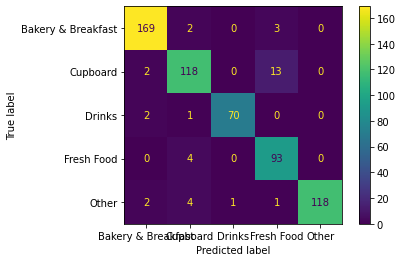

In [44]:
plot_confusion_matrix(model, X, y);

<div class="alert alert-block alert-info" style="background-color: #BA001E; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;">
<h2 style="color: white">
Predicting for new text input
</h2><br>
</div>

We're going to return to the simple text-only classifier and train a BernoulliNB model to learn to predict the target categories. Everything we've done so far is simply model evaluation to find the best "recipe".

Now we know the best recipe (`BernoulliNB(alpha=0.1)`) it's time to use that recipe to prepare our competition-winning cake. In other words, let's train the model on the full dataset and take it for a spin.

In [45]:
# Re-create X to work with just text data, and then train a model on the full dataset
X = pd.DataFrame(vectorizer.transform(df.Items).toarray(),
                 columns=vectorizer.get_feature_names())
y = df.Target

model = naive_bayes.BernoulliNB(alpha=0.1).fit(X, y)

In [46]:
# Let's construct some new data, I've made these up!
new_text = pd.Series([
    # Bakery & Breakfast
    'honey & maple syrup porridge',
    'bran flakes',
    
    # Cupboard
    'arborio risotto rice',
    'baking powder',

    # Drinks
    'cabernet sauvignon red wine',
    'sparkling water',
    
    # Fresh Food
    'wheel of cheese',
    'mixed grapes',
    
    # Other
    'cat food',
    'washing up liquid',
    
    # Trickier edge cases
    'banana bread',  # is it bananas or bread?
    'grape juice',
    'chocolate orange',  # one of your 5-a-day?
    
    # ADD YOUR OWN EXAMPLES UNDER HERE
    
])

In [47]:
# We need to vectorize the data first, but using the EXACT SAME vectorizer
# (remember the vectorizer was fitted to the training data)
X_predict = pd.DataFrame(vectorizer.transform(new_text).toarray(),
                         columns=vectorizer.get_feature_names())

In [48]:
X_predict

,10,100,100 juice,100plus,added,adult,adult care,adult complete,adult diapers,affair,...,wholemeal white,wild,wine,wipes,wolfberry,wonders,wonders baked,yellow,yellow label,yoghurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# This what the classifier model actually sees
pd.set_option('display.max_columns', None)

In [50]:
# Filter to only words in the feature matrix that are in our new_text list
non_zero_cols = (X_predict.sum() > 0)

In [51]:
non_zero_cols

10               False
100              False
100 juice        False
100plus          False
added            False
                 ...  
wonders          False
wonders baked    False
yellow           False
yellow label     False
yoghurt          False
Length: 1000, dtype: bool

In [52]:
# Pick out the columns that match this filter
non_zero_col_names = X_predict.columns[non_zero_cols]
non_zero_col_names

Index(['baking', 'banana', 'bran', 'bread', 'cat', 'cat food', 'cheese',
       'chocolate', 'food', 'grapes', 'honey', 'juice', 'liquid', 'maple',
       'mixed', 'orange', 'powder', 'red', 'red wine', 'rice', 'sauvignon',
       'syrup', 'water', 'wine'],
      dtype='object')

In [53]:
# Display the filtered dataframe and add in new_text as the index so it's easy to review
new_text_feature_matrix = X_predict[non_zero_col_names].set_index(new_text)
new_text_feature_matrix

,baking,banana,bran,bread,cat,cat food,cheese,chocolate,food,grapes,honey,juice,liquid,maple,mixed,orange,powder,red,red wine,rice,sauvignon,syrup,water,wine
honey & maple syrup porridge,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
bran flakes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
arborio risotto rice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
baking powder,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
cabernet sauvignon red wine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
sparkling water,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
wheel of cheese,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mixed grapes,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
cat food,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
washing up liquid,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

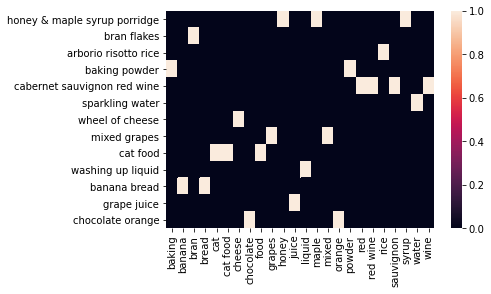

In [54]:
# This is a great way to visualise this matrix
sns.heatmap(new_text_feature_matrix)

In [55]:
# Generate the model's predictions
model.predict(X_predict)

array(['Bakery & Breakfast', 'Bakery & Breakfast', 'Cupboard', 'Cupboard',
       'Drinks', 'Drinks', 'Fresh Food', 'Fresh Food', 'Other', 'Other',
       'Bakery & Breakfast', 'Fresh Food', 'Bakery & Breakfast'],
      dtype='<U18')

In [56]:
# Construct a dataframe showing the predicted class + probabilities for other classes
# This gives us insight into the model's confidence for each prediction

predicted_classes = pd.DataFrame(model.predict(X_predict), columns=['Prediction'])

predicted_probabilities = pd.DataFrame(model.predict_proba(X_predict), columns=model.classes_)
predicted_probabilities = (predicted_probabilities * 100).round()  # formatted as %

# Horizontally concatenate & add in new_text
predictions = pd.concat(
    [predicted_classes,
     predicted_probabilities], axis=1).set_index(new_text)
predictions

,Prediction,Bakery & Breakfast,Cupboard,Drinks,Fresh Food,Other
honey & maple syrup porridge,Bakery & Breakfast,99.0,0.0,0.0,1.0,0.0
bran flakes,Bakery & Breakfast,71.0,12.0,3.0,11.0,3.0
arborio risotto rice,Cupboard,7.0,89.0,0.0,1.0,3.0
baking powder,Cupboard,0.0,84.0,2.0,0.0,13.0
cabernet sauvignon red wine,Drinks,0.0,0.0,100.0,0.0,0.0
sparkling water,Drinks,2.0,7.0,51.0,7.0,33.0
wheel of cheese,Fresh Food,9.0,1.0,0.0,89.0,0.0
mixed grapes,Fresh Food,0.0,43.0,1.0,56.0,0.0
cat food,Other,0.0,0.0,0.0,0.0,100.0
washing up liquid,Other,2.0,9.0,2.0,8.0,79.0


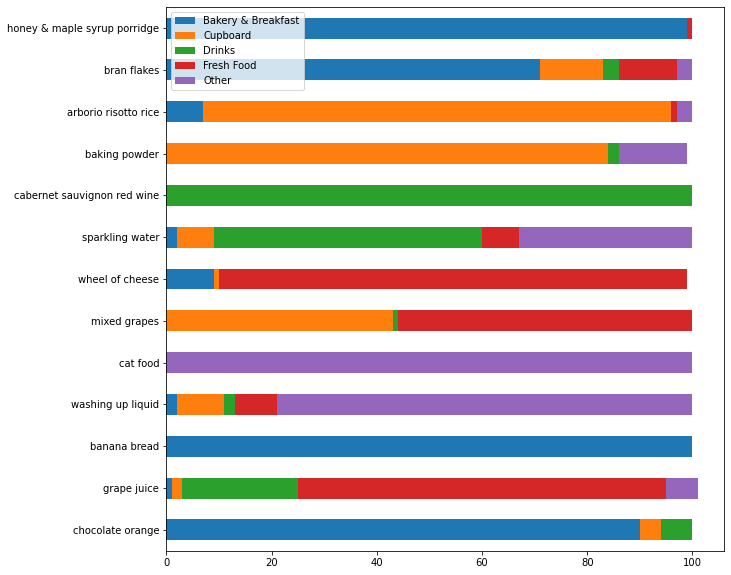

In [57]:
# Display stacked bar chart showing the predicted class probabilities for each item
predictions.iloc[::-1].plot.barh(stacked=True, figsize=(10,10));

---